## Microsoft Stock Prediction

This code loads and explores Microsoft stock data, visualizes trends, trains two different regression models to predict the closing price, and shows how to use one of the models for future predictions.

This code was based on: https://www.geeksforgeeks.org/machine-learning/microsoft-stock-price-prediction-with-machine-learning/

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [31]:
# Importing dataset from https://www.nasdaq.com/market-activity/stocks/msft/historical
microsoft = pd.read_csv('HistoricalData_1757789784716.csv')
print(microsoft.head())

         Date Close/Last    Volume      Open       High      Low
0  09/12/2025    $509.90  23624880   $506.65    $512.55  $503.85
1  09/11/2025    $501.01  18881610   $502.25    $503.17  $497.88
2  09/10/2025    $500.37  21611820   $502.98  $503.2299  $496.72
3  09/09/2025    $498.41  14410540   $501.43    $502.25  $497.70
4  09/08/2025    $498.20  16771020  $498.105   $501.195  $495.03


In [40]:
# Remove the '$' sign from the price columns and convert them to numeric
for col in ['Close/Last', 'Open', 'High', 'Low']:
    microsoft[col] = microsoft[col].astype(str).str.replace('$', '', regex=False)
    microsoft[col] = pd.to_numeric(microsoft[col])

print(microsoft.head())
print(microsoft.info())

        Date  Close/Last    Volume     Open      High     Low
0 2025-09-12      509.90  23624880  506.650  512.5500  503.85
1 2025-09-11      501.01  18881610  502.250  503.1700  497.88
2 2025-09-10      500.37  21611820  502.980  503.2299  496.72
3 2025-09-09      498.41  14410540  501.430  502.2500  497.70
4 2025-09-08      498.20  16771020  498.105  501.1950  495.03
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1256 non-null   datetime64[ns]
 1   Close/Last  1256 non-null   float64       
 2   Volume      1256 non-null   int64         
 3   Open        1256 non-null   float64       
 4   High        1256 non-null   float64       
 5   Low         1256 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB
None


In [41]:
# Understanding Data
microsoft.shape

(1256, 6)

In [42]:
# Understanding Data
microsoft.describe()

,Date,Close/Last,Volume,Open,High,Low
count,1256,1256.000000,1.256000e+03,1256.000000,1256.000000,1256.000000
mean,2023-03-13 01:38:35.923566848,331.022548,2.594091e+07,330.938013,334.042339,327.731695
min,2020-09-14 00:00:00,200.390000,7.164543e+06,197.190000,202.710000,196.250000
25%,2021-12-09 18:00:00,257.345000,1.927423e+07,257.586250,260.327425,254.617500
50%,2023-03-13 12:00:00,315.120000,2.357656e+07,314.630000,318.540000,311.565400
75%,2024-06-11 06:00:00,409.365000,2.995338e+07,408.822500,412.872500,406.315000
max,2025-09-12 00:00:00,535.640000,9.042885e+07,555.225000,555.450000,531.900000
std,NaN,83.287631,1.005261e+07,83.382660,83.624731,82.922803


In [43]:
# Understanding Data
# This line provides a concise summary of the DataFrame.
# It includes the index dtype and columns, non-null values and memory usage.
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1256 non-null   datetime64[ns]
 1   Close/Last  1256 non-null   float64       
 2   Volume      1256 non-null   int64         
 3   Open        1256 non-null   float64       
 4   High        1256 non-null   float64       
 5   Low         1256 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB


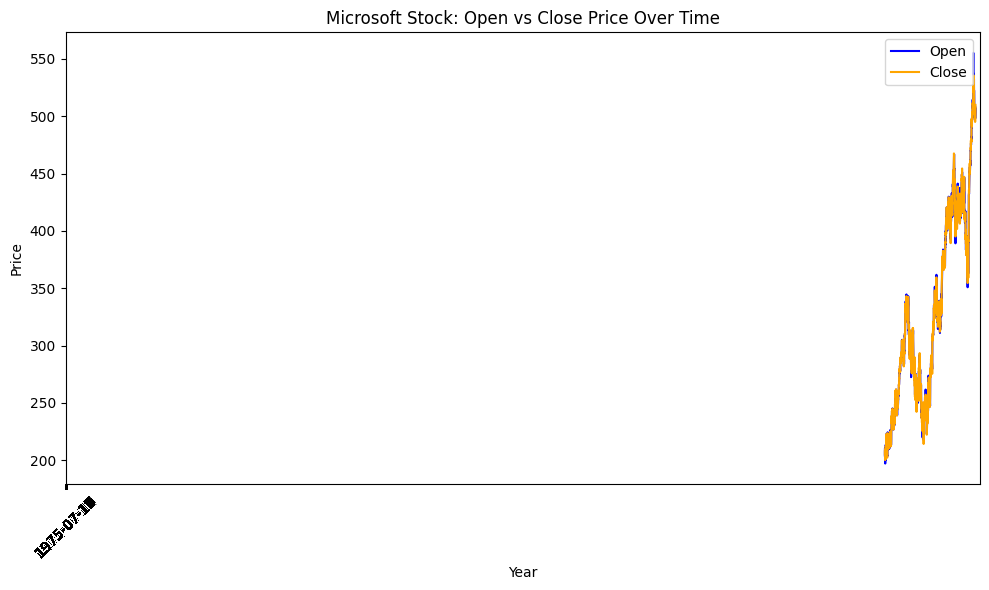

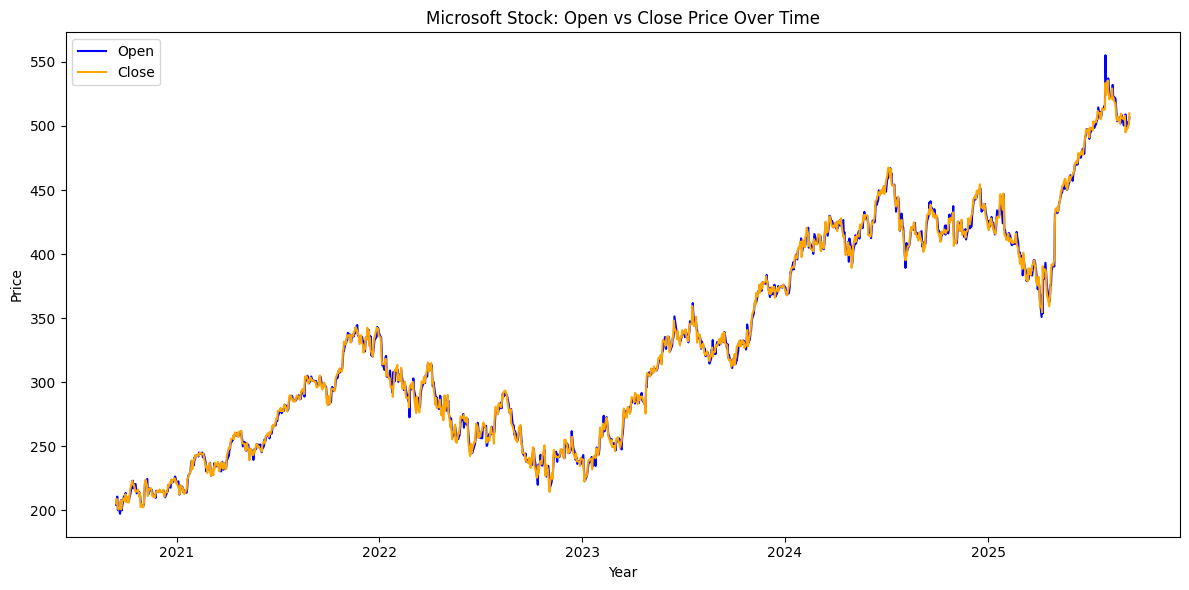

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

# Plot the 'Open' price over time in blue
plt.plot(microsoft['Date'], microsoft['Open'], label='Open', color='blue')

# Plot the 'Close/Last' price over time in orange
plt.plot(microsoft['Date'], microsoft['Close/Last'], label='Close', color='orange')

# Set the title of the plot
plt.title('Microsoft Stock: Open vs Close Price Over Time')

# Set the label for the x-axis
plt.xlabel('Year')

# Set the label for the y-axis
plt.ylabel('Price')

# Add a legend to the plot to identify the lines
plt.legend()

# Adjust the plot to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

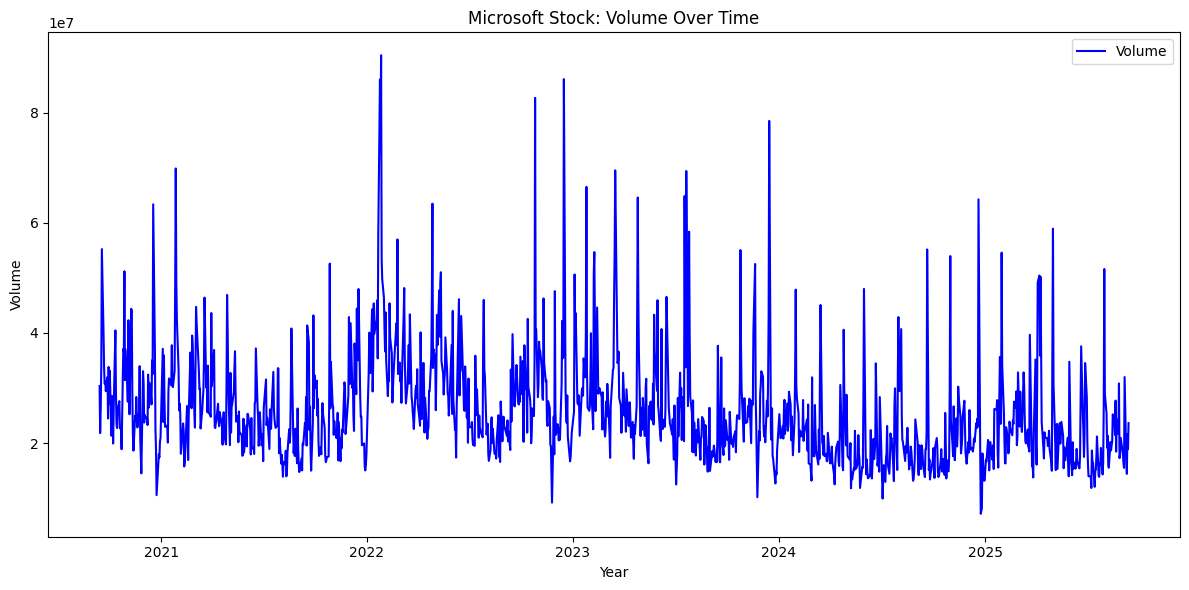

In [49]:
# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

# Plot the 'volume' over time in blue
plt.plot(microsoft['Date'], microsoft['Volume'], label='Volume', color='blue')

# Set the title of the plot
plt.title('Microsoft Stock: Volume Over Time')

# Set the label for the x-axis
plt.xlabel('Year')

# Set the label for the y-axis
plt.ylabel('Volume')

# Add a legend to the plot
plt.legend()

# Adjust the plot to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

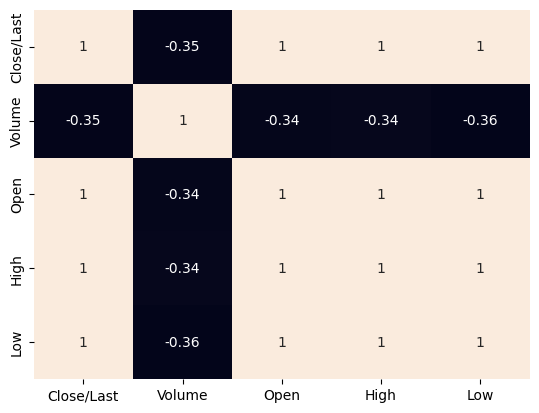

In [50]:
# Generate a heatmap to visualize the correlation matrix of the numerical columns
sns.heatmap(microsoft.select_dtypes(include=np.number).corr(),
                        annot=True,  # Display the correlation values on the heatmap
                        cbar=False) # Do not display the color bar
plt.show() # Display the plot

In [51]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Example dataset (replace with your own data)
X = microsoft.loc[:,['Open','High','Low','Volume']]  # Features
y = microsoft.loc[:,'Close/Last']          # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Model Coefficient: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error: 4.130667630918883
Root Mean Squared Error: 2.0324043965015632
R-squared: 0.9993940444688381
Model Coefficient: [-6.49078550e-01  8.03589450e-01  8.45865358e-01 -1.59175525e-08]
Model Intercept: 0.5931136602245033


In [52]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Example dataset (replace with your own data)
X = microsoft.loc[:,['Open','High','Low','Volume']]  # Features
y = microsoft.loc[:,'Close/Last']          # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 11.011282406726538
Root Mean Squared Error: 3.318325241251457
R-squared: 0.9983846806192785


In [54]:
# Replace this with your actual 2026 data
# This is just example data for demonstration purposes
new_data_2026 = pd.DataFrame({
    'Open': np.random.rand(10) * 20 + 500, # Example open prices
    'High': np.random.rand(10) * 20 + 505, # Example high prices
    'Low': np.random.rand(10) * 20 + 495,  # Example low prices
    'Volume': np.random.rand(10) * 5000000 + 20000000 # Example volume
})


# Make predictions on the new data
predicted_prices_2026 = model.predict(new_data_2026)

# Print the predicted prices
print("Predicted prices for 2026:")
print(predicted_prices_2026)

Predicted prices for 2026:
[513.14858177 509.78629444 514.15279276 505.08680095 513.97442427
 513.51402078 515.085642   514.62830501 512.87045103 515.21347942]
